In [1]:
# Support Vector Machine
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('final.csv')

In [6]:
df.head()

,Original,Additional,label,fingerprint_similarity,simword_similarity,lsa_sim,bigram_similarity,trigram_similarity
0,object-oriented programming inheritance way fo...,inheritance basic concept object-oriented prog...,0,0.455696,0.118644,0.235,0.849462,0.545220
1,object-oriented programming inheritance way fo...,inheritance basic concept object oriented prog...,0,0.375000,0.148352,0.216,0.843137,0.562212
2,object-oriented programming inheritance way fo...,inheritance object oriented programming new cl...,1,0.575758,0.230303,0.481,0.953125,0.767943
3,object-oriented programming inheritance way fo...,inheritance object oriented programming way fo...,1,0.577465,0.492647,0.778,0.971154,0.955157
4,object-oriented programming inheritance way fo...,object-oriented programming inheritance way fo...,1,1.000000,0.837037,0.963,1.000000,0.995392


In [5]:
feature_df = df[[ 'lsa_sim' , 'fingerprint_similarity','simword_similarity','bigram_similarity']] 

In [7]:
feature_df.head()

,lsa_sim,fingerprint_similarity,simword_similarity,bigram_similarity
0,0.235,0.455696,0.118644,0.849462
1,0.216,0.375000,0.148352,0.843137
2,0.481,0.575758,0.230303,0.953125
3,0.778,0.577465,0.492647,0.971154
4,0.963,1.000000,0.837037,1.000000


In [8]:
#independent variables
x= np.asarray(feature_df)

#dependent variables 
y= np.asarray(df['label'])

In [10]:
print("x : \n",x[1:10])
print("y : \n",y[1:10])

x : 
 [[0.216      0.375      0.14835165 0.84313725]
 [0.481      0.57575758 0.23030303 0.953125  ]
 [0.778      0.57746479 0.49264706 0.97115385]
 [0.963      1.         0.83703704 1.        ]
 [0.37       0.48       0.13017751 0.86440678]
 [0.187      0.50649351 0.1        0.85353535]
 [0.569      0.67164179 0.33333333 0.95305164]
 [0.213      0.50649351 0.145      0.81415929]
 [0.215      0.43835616 0.14705882 0.87567568]]
y : 
 [0 1 1 1 0 0 1 0 0]


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.9,random_state=4)

In [12]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [14]:

#SVC = support vector classifer
model = svm.SVC(kernel='linear', gamma = 'auto', C = 1)

In [15]:
model.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [17]:
y_pred = model.predict(x_test)

In [19]:
print("accuracy score with linear kernel :")
print(metrics.accuracy_score(y_test,y_pred))

accuracy score with linear kernel :
0.8372093023255814


In [20]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score

# Generate toy data
X = np.array([[0,0,0,0], [1,1,1,1], [0,1,0,1], [1,0,1,0]])
y = np.array([0,1,1,0])

# Fit SVM to data
clf = svm.SVC(kernel='linear', C=1)

# Compute accuracy for each feature
accuracies = []
for i in range(4):
    clf.fit(X[:,i].reshape(-1,1), y)
    y_pred = clf.predict(X[:,i].reshape(-1,1))
    acc = accuracy_score(y, y_pred)
    accuracies.append(acc)
    
print("Accuracies for each feature:", accuracies)


Accuracies for each feature: [0.5, 1.0, 0.5, 1.0]


In [47]:
feature_df2 = df[[ 'lsa_sim','fingerprint_similarity','simword_similarity','bigram_similarity']] 
#feature_df1 = df[ 'fingerprint_similarity']
feature_df1 = df[['bigram_similarity','lsa_sim','fingerprint_similarity' ]]
feature_df0 = df[['fingerprint_similarity','lsa_sim']] 

In [61]:
accuracy=np.array([])

In [66]:
#independent variables
x= np.asarray(feature_df2)

#dependent variables 
y= np.asarray(df['label'])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.9,random_state=4)
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
model = svm.SVC(kernel='linear', gamma = 'auto', C = 1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
a=metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred))

0.8372093023255814


In [67]:
accuracy=np.append(accuracy,a)
print(accuracy)

[0.77906977 0.79069767 0.8372093 ]


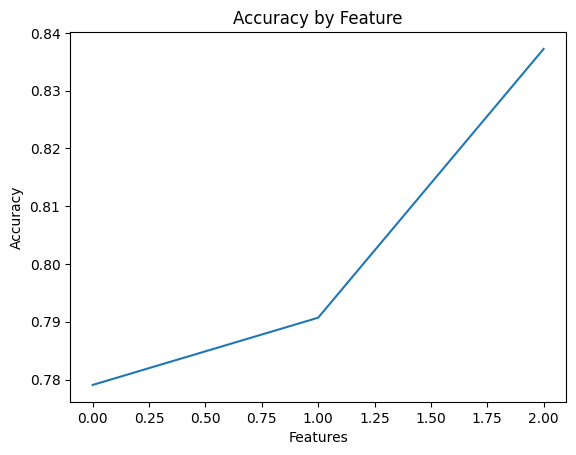

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data
plt.plot(accuracy)

# Add labels and title to the plot
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.title('Accuracy by Feature')

# Show the plot
plt.show()


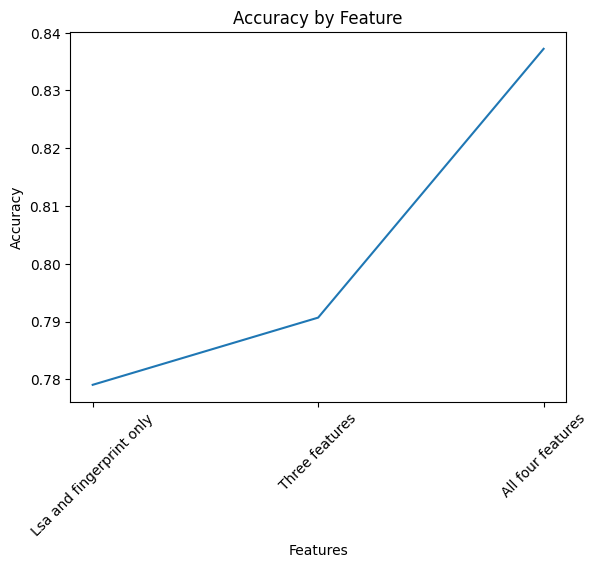

In [76]:

# Plot the data
plt.plot(accuracy)


# Add labels and title to the plot
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.title('Accuracy by Feature')

# Add feature names to the x-axis
feature_names = ['Lsa and fingerprint only', 'Three features', 'All four features']
plt.xticks(range(len(feature_names)), feature_names, rotation=45)

# Show the plot
plt.show()
